# 라이브러리 가져오기

In [1]:
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#csv는 엑셀과 달리 , 를 통해 데이터를 구분
colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
# 한글 폰트 사용을 위해서 세팅

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 데이터 가져오기

In [2]:
# 대출 데이터
lib_bor = pd.read_csv("./데이터2022/데이터_단행본대출.csv", encoding = 'cp949',low_memory=False) 
lib_bor = lib_bor.dropna(how='any') #-> NA하나라도 있으면 지움
lib_bor= lib_bor.drop([lib_bor.columns[0],lib_bor.columns[1],lib_bor.columns[2],lib_bor.columns[5],lib_bor.columns[9]], axis= 1)

#도서 데이터
book = pd.read_csv("./데이터2022/데이터_단행본도서.csv", encoding = 'cp949',low_memory=False) 
book = book.dropna(how='any') #-> NA하나라도 있으면 지움
book= book.drop([book.columns[0],book.columns[1],book.columns[2],book.columns[3],book.columns[6],book.columns[7],book.columns[8],book.columns[9],book.columns[11],book.columns[12]], axis= 1)

# 데이터 합병

In [3]:
bor_book =pd.merge(lib_bor,book, on = ['ISBN','서명'], how = 'outer')
bor_book = bor_book.dropna(how='any') #-> NA하나라도 있으면 지움
bor_book.index = np.arange(len(bor_book))
bor_book['연대출권수'] = bor_book['연대출권수'].astype(int)
bor_book['입학년도'] = bor_book['입학년도'].astype(int)

앞써 발견한 문제점 : 학생이 여러권의 도서를 빌릴때 서명이 맨앞에 한개만 남는다

해결책: primary key에 서명을 추가해 주자

In [4]:
#bor_book =bor_book.drop_duplicates(['연대출권수' ,'입학년도','소속'])
bor_book =bor_book.drop_duplicates(['연대출권수' ,'입학년도','소속','서명'])
bor_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59428 entries, 0 to 377011
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    59428 non-null  object
 1   서명      59428 non-null  object
 2   연대출권수   59428 non-null  int32 
 3   입학년도    59428 non-null  int32 
 4   소속      59428 non-null  object
 5   분류코드    59428 non-null  object
dtypes: int32(2), object(4)
memory usage: 2.7+ MB


In [5]:
bor_book.head(10)

,ISBN,서명,연대출권수,입학년도,소속,분류코드
0,9788970551234,소유냐 삶이냐,90,2014,금융경제학과,111.1
2,9788970551234,소유냐 삶이냐,6,2016,컴퓨터학부,111.1
6,9788970551234,소유냐 삶이냐,7,2014,컴퓨터학부,111.1
8,9788970551234,소유냐 삶이냐,95,2010,경제학과,111.1
16,9788970551234,소유냐 삶이냐,39,2017,금융학부,111.1
20,9788970551234,소유냐 삶이냐,195,2012,글로벌미디어학부,111.1
22,9788970551234,소유냐 삶이냐,85,2017,철학과,111.1
26,9788970551234,소유냐 삶이냐,26,2017,철학과,111.1
28,9791186289501,노동법 원포인트 판례 170선,49,2010,벤처중소기업학과,348.6
30,9791186289501,노동법 원포인트 판례 170선,46,2010,벤처중소기업학과,348.6


# 데이터 전처리

분류코드를 10단위로 전처리 해주자

In [6]:
bor_book['분류코드'] =bor_book['분류코드'].astype(str)
bor_book['분류코드'] = bor_book['분류코드'].apply(lambda x : x[:3])
bor_book['분류코드'] =bor_book['분류코드'].astype(int)
bor_book['분류코드'] = bor_book['분류코드'].apply(lambda x : (x//10)*10)
bor_book.head(10)

,ISBN,서명,연대출권수,입학년도,소속,분류코드
0,9788970551234,소유냐 삶이냐,90,2014,금융경제학과,110
2,9788970551234,소유냐 삶이냐,6,2016,컴퓨터학부,110
6,9788970551234,소유냐 삶이냐,7,2014,컴퓨터학부,110
8,9788970551234,소유냐 삶이냐,95,2010,경제학과,110
16,9788970551234,소유냐 삶이냐,39,2017,금융학부,110
20,9788970551234,소유냐 삶이냐,195,2012,글로벌미디어학부,110
22,9788970551234,소유냐 삶이냐,85,2017,철학과,110
26,9788970551234,소유냐 삶이냐,26,2017,철학과,110
28,9791186289501,노동법 원포인트 판례 170선,49,2010,벤처중소기업학과,340
30,9791186289501,노동법 원포인트 판례 170선,46,2010,벤처중소기업학과,340


# 전체 학생들 중 베스트 셀러 Top 10

In [7]:
#전체 베스트 셀러
item_count = bor_book['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 왜 나는 너를 사랑하는가 212
Top 2 : 참을 수 없는 존재의 가벼움 202
Top 3 : 데미안 173
Top 4 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가 158
Top 5 : 사랑의 기술 150
Top 6 : 미분적분학 =Calculus 144
Top 7 : 이갈리아의 딸들 143
Top 8 : 위대한 개츠비 135
Top 9 : 역사란 무엇인가 126
Top 10 : 멋진 신세계 123


# 전체 학생들 중 인기 분야 Top 10

In [8]:
#전체 베스트 셀러 Top 순위 : 분류코드 개수
item_count = bor_book['분류코드'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 650 7093
Top 2 : 340 5472
Top 3 : 330 4871
Top 4 : 0 4049
Top 5 : 810 3349
Top 6 : 620 3035
Top 7 : 910 2447
Top 8 : 510 2397
Top 9 : 820 2214
Top 10 : 420 2203


# 재학생을 고려하여 12 ~ 21학번만 고려하자

In [9]:
bor_book = bor_book[bor_book['입학년도']> 2011]
bor_book.head(15)

,ISBN,서명,연대출권수,입학년도,소속,분류코드
0,9788970551234,소유냐 삶이냐,90,2014,금융경제학과,110
2,9788970551234,소유냐 삶이냐,6,2016,컴퓨터학부,110
6,9788970551234,소유냐 삶이냐,7,2014,컴퓨터학부,110
16,9788970551234,소유냐 삶이냐,39,2017,금융학부,110
20,9788970551234,소유냐 삶이냐,195,2012,글로벌미디어학부,110
22,9788970551234,소유냐 삶이냐,85,2017,철학과,110
26,9788970551234,소유냐 삶이냐,26,2017,철학과,110
40,9791186289501,노동법 원포인트 판례 170선,43,2015,법학과,340
46,9791186289501,노동법 원포인트 판례 170선,17,2014,국제법무학과,340
58,9791186289501,노동법 원포인트 판례 170선,33,2013,경영학부,340


# TARGET 학생들 중 베스트 셀러 Top 10

In [10]:
#전체 베스트 셀러
item_count = bor_book['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 왜 나는 너를 사랑하는가 205
Top 2 : 참을 수 없는 존재의 가벼움 193
Top 3 : 데미안 168
Top 4 : 사랑의 기술 141
Top 5 : 이갈리아의 딸들 141
Top 6 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가 140
Top 7 : 미분적분학 =Calculus 133
Top 8 : 위대한 개츠비 131
Top 9 : 역사란 무엇인가 122
Top 10 : 멋진 신세계 117


# TARGET 학생들 중 인기 분야 Top 10

In [11]:
#전체 베스트 셀러 Top 순위 : 분류코드 개수
item_count = bor_book['분류코드'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 650 6236
Top 2 : 340 4880
Top 3 : 330 4465
Top 4 : 0 3841
Top 5 : 810 3146
Top 6 : 620 2824
Top 7 : 910 2274
Top 8 : 510 2236
Top 9 : 820 2108
Top 10 : 420 1969


# (학과 학번)별로  분류

In [12]:
tmp_group = bor_book.groupby(['소속','입학년도'])

In [13]:
tmp_dic = dict(list(tmp_group))
tmp_dic.keys()

dict_keys([('AI융합학부', 2012), ('AI융합학부', 2013), ('AI융합학부', 2014), ('AI융합학부', 2015), ('AI융합학부', 2016), ('AI융합학부', 2017), ('AI융합학부', 2018), ('AI융합학부', 2019), ('AI융합학부', 2020), ('AI융합학부', 2021), ('건축학부', 2012), ('건축학부', 2013), ('건축학부', 2014), ('건축학부', 2015), ('건축학부', 2016), ('건축학부', 2017), ('건축학부', 2018), ('건축학부', 2019), ('건축학부', 2020), ('건축학부', 2021), ('경영학부', 2012), ('경영학부', 2013), ('경영학부', 2014), ('경영학부', 2015), ('경영학부', 2016), ('경영학부', 2017), ('경영학부', 2018), ('경영학부', 2019), ('경영학부', 2020), ('경영학부', 2021), ('경제학과', 2012), ('경제학과', 2013), ('경제학과', 2014), ('경제학과', 2015), ('경제학과', 2016), ('경제학과', 2017), ('경제학과', 2018), ('경제학과', 2019), ('경제학과', 2020), ('경제학과', 2021), ('국어국문학과', 2012), ('국어국문학과', 2013), ('국어국문학과', 2014), ('국어국문학과', 2015), ('국어국문학과', 2016), ('국어국문학과', 2017), ('국어국문학과', 2018), ('국어국문학과', 2019), ('국어국문학과', 2020), ('국어국문학과', 2021), ('국제무역학과', 2014), ('국제무역학과', 2015), ('국제무역학과', 2016), ('국제무역학과', 2017), ('국제무역학과', 2018), ('국제무역학과', 2019), ('국제무역학과', 2020), ('국제무역학과', 2021), ('국제법

In [14]:
print(tmp_dic[('건축학부',2018)]['서명'].count())
print(tmp_dic[('건축학부',2018)]['서명'])

128
3907                     (이규상) 건축계획학 :기본서 :국토계획법등법령개정반영
24278                         당신, 거기 있어줄래요? :기욤 뮈소 장편소설
45617                                            멋진 신세계
52139                                          이갈리아의 딸들
52155                                          이갈리아의 딸들
                              ...                      
374311                                예술에서의 정신적인 것에 대하여
374671                              (K-IFRS) 최신 회계원리 이해
376157    돈이 보이는 주식의 역사 :주식시장의 폭락과 버블 속에서 배우는 주식투자 인사이트
376210                                     법학개론 :2021년판
376569                                 기업금융과 M＆A :개정증보판
Name: 서명, Length: 128, dtype: object


In [15]:
x = tmp_dic.keys()
x_val =  np.arange(len(tmp_dic.keys()))
y_val = []
count= 0
for x in tmp_dic.keys():
    count += 1
    y_val.append(int(tmp_dic[(x)]['서명'].count()))

<BarContainer object of 466 artists>

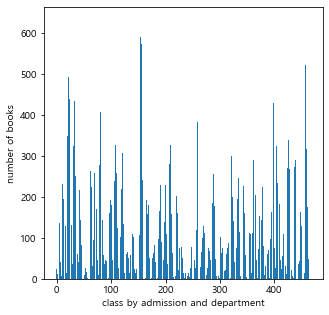

In [16]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.xlabel("class by admission and department")
plt.ylabel("number of books")
plt.bar(x_val,y_val, align = 'center')

# 학번별 베스트 셀러 추천 서비스

In [17]:
exist_year = []
for n in range (2012,2022):
    exist_year.append(n)
exist_year

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [18]:
#12~ 21
best_seller_dataframe = []
for year in exist_year:
    if (year < 2012):
        continue
    else:
        tmp_data_frame = bor_book[bor_book['입학년도']== year]
        best_seller_dataframe.append(pd.DataFrame(data= tmp_data_frame))

In [24]:
#학번 별 베스트 셀러(2012~2021)
########################################################################
admission_year = int(input("입학년도를 입력해주세요 (2012~2021) \n\n"))#
########################################################################

for index_num in range(0,len(best_seller_dataframe)):
    if int(best_seller_dataframe[index_num]['입학년도'].mean()) == admission_year: #보고 싶은 학번
        print("\n-------------------------",int(best_seller_dataframe[index_num]['입학년도'].mean()),"-------------------------")
        test = best_seller_dataframe[index_num]["서명"]
        item_count = test.value_counts()[:10]
        for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
            print("")
            print('Top',idx,":",val)
        print("")

입학년도를 입력해주세요 (2012~2021) 

2014

------------------------- 2014 -------------------------

Top 1 : 참을 수 없는 존재의 가벼움

Top 2 : 미분적분학 =Calculus

Top 3 : 왜 나는 너를 사랑하는가

Top 4 : 데미안

Top 5 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가

Top 6 : 국제법 판례 100선 =International law cases

Top 7 : 미시경제학 :수학노트와 연습문제 해답

Top 8 : 미시경제학

Top 9 : 위대한 개츠비

Top 10 : 전자기학



# 학번별 DDC 추천 서비스

In [25]:
#학번 별 ddc 추천(2012~2021)
########################################################################
admission_year = int(input("입학년도를 입력해주세요 (2012~2021) \n\n"))#
########################################################################

for index_num in range(0,len(best_seller_dataframe)):
    if int(best_seller_dataframe[index_num]['입학년도'].mean()) == admission_year: #보고 싶은 학번
        print("\n-------------------------",int(best_seller_dataframe[index_num]['입학년도'].mean()),"-------------------------")
        test = best_seller_dataframe[index_num]["분류코드"]
        item_count = test.value_counts()[:5]
        for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
            print("")
            print(val)
        print("")

입학년도를 입력해주세요 (2012~2021) 

2013

------------------------- 2013 -------------------------

650

340

330

0

620

